# Introduction



In the previous chapter, data in the **IMDB** database where prepared for you. In fact, before making any machine learning on a 'real' text or on 'raw data' in general, it is necessary to clean them and put them in a format adapted to ML (vectors of constant size for instance). For NLP, another step is the encoding (we used in the previous chapter a one-hot-encoding which has some drawback. This chapter addresses these questions by the presentation of the notions of :

*   Tokenization
*   Lemmatization
*   Bag of words
*   Vector Embedding

We also compare the results of the sentiment analysis problem with and without embedding.

# From raw data to tokens

# Application of Deep Learning for Natural Langage Processing (NLP) 2 : Preparation of the data and encoding (Tokenization, Lemmatization and Embedding)
## Practical work - ENIB - Artificial Intelligence and Simulation module 
**Pierre De Loor**


In order to start from scratch, we will use a "raw" text (the metamorphosis from F. Kafka) which is a public domain book but which is not prepared for machine learning. To use the code on google collab, you need to make a link between your google drive and google colab. The file is [here](https://www.enib.fr/~deloor/materielPedagogique/IA/metamorphosis_clean.txt): please download it on your google drive.

**Find below some code to allow the opening of a file that is in your drive into google colab**

Step 1 : Import Libraries

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Step 2 : Authenticate your account

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Step 3 : Get File from Drive using file-ID (to obtain the file ID you need to go in your google drive, click on your file and ask for a shareable link (without the http adress)

In [ ]:
downloaded = drive.CreateFile({'id':'1BSD1npF4-ZEgUNOaznydJ83BoZVM7W6s'}) # replace the id with id of file you want to access
downloaded.GetContentFile('metamorphosis_clean.txt') 

Step 4 : Read File

In [ ]:
file = open('metamorphosis_clean.txt')
for i in range(0,20):
  print(file.readline())


One morning, when Gregor Samsa woke from troubled dreams, he found

himself transformed in his bed into a horrible vermin.  He lay on

his armour-like back, and if he lifted his head a little he could

see his brown belly, slightly domed and divided by arches into stiff

sections.  The bedding was hardly able to cover it and seemed ready

to slide off any moment.  His many legs, pitifully thin compared

with the size of the rest of him, waved about helplessly as he

looked.



"What's happened to me?" he thought.  It wasn't a dream.  His room,

a proper human room although a little too small, lay peacefully

between its four familiar walls.  A collection of textile samples

lay spread out on the table - Samsa was a travelling salesman - and

above it there hung a picture that he had recently cut out of an

illustrated magazine and housed in a nice, gilded frame.  It showed

a lady fitted out with a fur hat and fur boa who sat upright,

raising a heavy fur muff that covered the whole of

**Different cleaning possibilities**

Depending on the text, different traitement must be done. Launch the code below and pay attention to expressions like "What's", "me?", "morning," or "armour-like" to understand the subtility of these different propositions


Proposition 1 : Separation of each word into a table with the <code>split()</code> function

In [ ]:
file = open('metamorphosis_clean.txt')
text = file.read()
file.close()
# split into words by white space
words = text.split()
print(words[:100])

['One', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"What\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.', 'His', 'room,', 'a', 'proper', 'human']


Proposition 2: using regular expressions with the library [re](https://docs.python.org/3/library/re.html). You can have some explanations on regular expressions [here](https://docs.python.org/3/howto/regex.html#regex-howto)



In [ ]:
import re
words2 = re.split(r'\W+', text)
print(words2[:100])

['One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armour', 'like', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 's', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasn', 't', 'a', 'dream', 'His', 'room']


Proposition 3 : removing punctuations

In [ ]:
import string
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
stripped = [re_punc.sub('', w) for w in words]
print(stripped[:100])

['One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armourlike', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'Whats', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasnt', 'a', 'dream', 'His', 'room', 'a', 'proper', 'human']


# Question 2.1: 
Can you explain the differences between the differents propositions ? Which pro and cons of each methods ?

-Proposition 1-
Chaque mot est séparé mais un mot avec une majuscule ou une ponctuation sera différent d'un autre. La séparation n'est pas excellente.

-Proposition 2-
La librairie `re` permet de remplacer les expressions régulière et donc de simplifier le texte pour mieux le comprendre. Il supprime aussi la ponctuation.

-Proposition 3-
Retirer la ponctuation ne résout pas le problème des majuscules qui créent une différence entre les mots.

# Using NLTK for  cleaning and tokenization
NLTK is a library that includes some functions ready to use for cleaning and tokenizing a text. See [here](https://www.nltk.org/) for more information.

Split into sentences :

In [ ]:
import nltk
from nltk import sent_tokenize
nltk.download('punkt')
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text=file.read()
file.close()
sentences = sent_tokenize(text)
print(sentences[0])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.


Split into words :

In [ ]:
from nltk.tokenize import word_tokenize
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
print(tokens[:100])

['One', 'morning', ',', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', ',', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', '.', 'He', 'lay', 'on', 'his', 'armour-like', 'back', ',', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', ',', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', '.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', '.', 'His', 'many', 'legs', ',', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', '.', '``', 'What', "'s", 'happened', 'to']


Filter out punctuation :

In [ ]:
from nltk.tokenize import word_tokenize
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 'happened', 'to', 'me', 'he', 'thought', 'It', 'was', 'a', 'dream', 'His', 'room', 'a', 'proper', 'human', 'room']


Filter out stop words : stop words are words that are not considered as essential to understand the main sense of a sentence. It is dependant of the language. Here is the code to obtain stop words considered by NLTK for English :

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

And here for French :

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('french')
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

Generally, stop words are deleted because they are numerous and introduce 'noise' to distinguish different sentences and meaning. The following code is a cleaning of the text that include this task (and previous one).

In [ ]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['one', 'morning', 'gregor', 'samsa', 'woke', 'troubled', 'dreams', 'found', 'transformed', 'bed', 'horrible', 'vermin', 'lay', 'armourlike', 'back', 'lifted', 'head', 'little', 'could', 'see', 'brown', 'belly', 'slightly', 'domed', 'divided', 'arches', 'stiff', 'sections', 'bedding', 'hardly', 'able', 'cover', 'seemed', 'ready', 'slide', 'moment', 'many', 'legs', 'pitifully', 'thin', 'compared', 'size', 'rest', 'waved', 'helplessly', 'looked', 'happened', 'thought', 'nt', 'dream', 'room', 'proper', 'human', 'room', 'although', 'little', 'small', 'lay', 'peacefully', 'four', 'familiar', 'walls', 'collection', 'textile', 'samples', 'lay', 'spread', 'table', 'samsa', 'travelling', 'salesman', 'hung', 'picture', 'recently', 'cut', 'illustrated', 'magazine', 'housed', 'nice', 'gilded', 'frame', 'showed', 'lady', 'fitted', 'fur', 'hat', 'fur', 'boa', 'sat', 'upright', 'raising', 'heavy', 'fur', 'muff', 'covered', 'whole', 'lower', 'arm', 'towards', 'viewer']


It is interesseting to read the cleaned text and to compare with the original to perceive what is simplified and what is preserved.

**Stem word :** Stemming refers to the process of reducing each word to its root or base. This avoid the multiplication of variant of a same word (for instance, *fishing, fished, fisher*) by preserving the "sense" *fish*. As for the stop words, there could be different way to consider how words must be stemmed. One example is the Porter Stemming algorithm but there exist a lot of others.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# stemming of words
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in tokens]
print(stemmed[:100])

['one', 'morn', ',', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubl', 'dream', ',', 'he', 'found', 'himself', 'transform', 'in', 'hi', 'bed', 'into', 'a', 'horribl', 'vermin', '.', 'He', 'lay', 'on', 'hi', 'armour-lik', 'back', ',', 'and', 'if', 'he', 'lift', 'hi', 'head', 'a', 'littl', 'he', 'could', 'see', 'hi', 'brown', 'belli', ',', 'slightli', 'dome', 'and', 'divid', 'by', 'arch', 'into', 'stiff', 'section', '.', 'the', 'bed', 'wa', 'hardli', 'abl', 'to', 'cover', 'it', 'and', 'seem', 'readi', 'to', 'slide', 'off', 'ani', 'moment', '.', 'hi', 'mani', 'leg', ',', 'piti', 'thin', 'compar', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'wave', 'about', 'helplessli', 'as', 'he', 'look', '.', '``', 'what', "'s", 'happen', 'to']


**Lemmatization** :
Unlike stemming, wherein a few characters are removed from words using crude methods, lemmatization is a process wherein the context is used to convert a word to its meaningful base form. It helps in grouping together words that have a common base form and so can be identified as a single item. The base form is referred to as the lemma of the word and is
also sometimes known as the dictionary form. We will not enter into details about lemmatization (for example and comparaison of lemmatization algorithms see [here](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf)). We can just consider that it is a more 'intelligent' stemming algorithm that provides, in fine, a list of more relevant tokens than the stemming provides. However to do that, the process is more complex because it needs to have a dictionnary and a 'part of speech' tags for the words (i.e. is there a noun, a verb, an adjective ...)

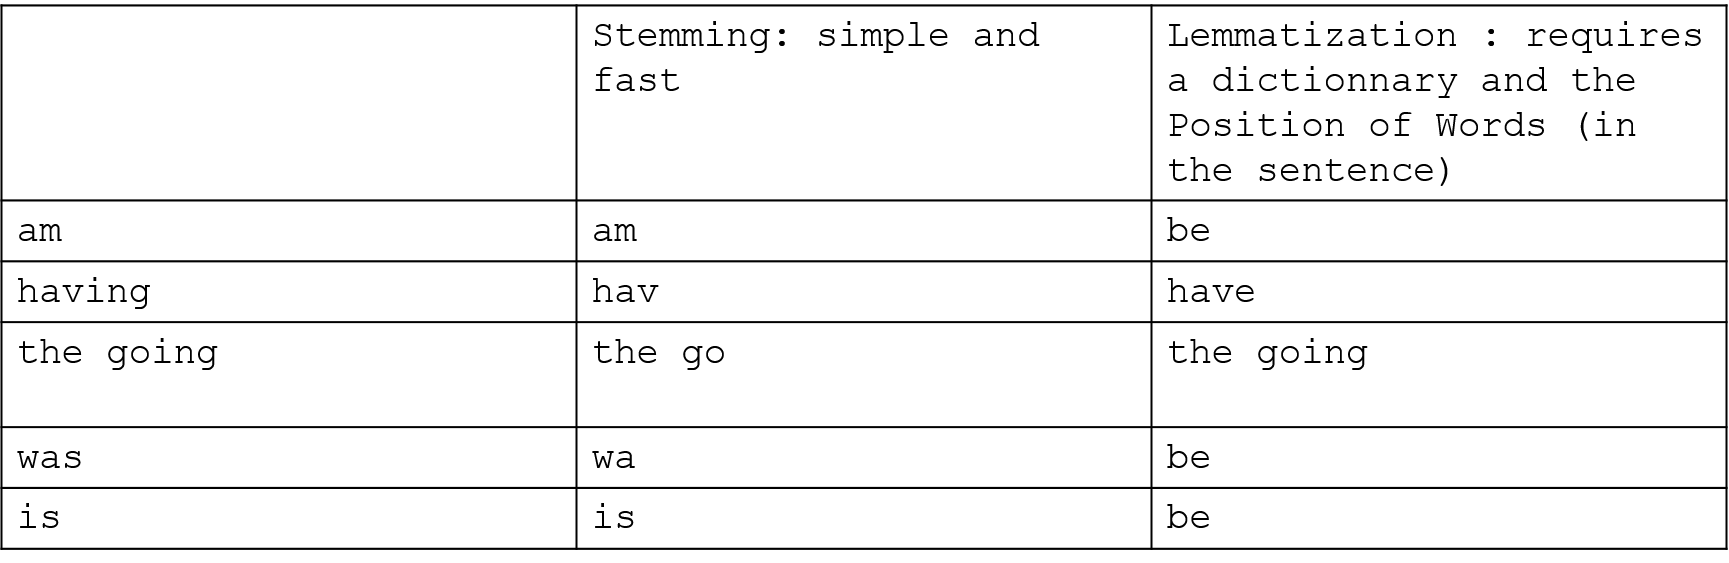

# Summary
In this section you discovered through an example what is the task of "tokenization". In short, it is a computation of 'tokens' that represent the main words of the text in a normalized way (without punctuation, sometime without stop words, often words are stemmed and generally they are in lower cases). The choice of theses options depends of the goal of the NLP and it is possible to add other cleaning (for example deletion of numbers, deletion of markup like HTML, normalization of the encoding (UTF8), etc.). After the tokenization, it is time to convert the text in number in order to use machine learning algorithms. We saw the use of NLTK but <code>keras</code> has it's own tokenizer. Here is a simple code in <code>keras</code> to tokenize one sentence :


In [ ]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


# Bag of words

One-hot encoding (used in the part 1) don't take into account the number of occurences of each words. Yet, this information could be relevant to classify a document (for instance if a document includes a lot of repetition of the word 'no', it could have a *strong* negative sense). A simple solution is to count the number of occurences of each words in the document and to make a vector of counters. It is the **"bag-of-words"** model. It has the disavantage to throws away all the order of the words in the documents. 




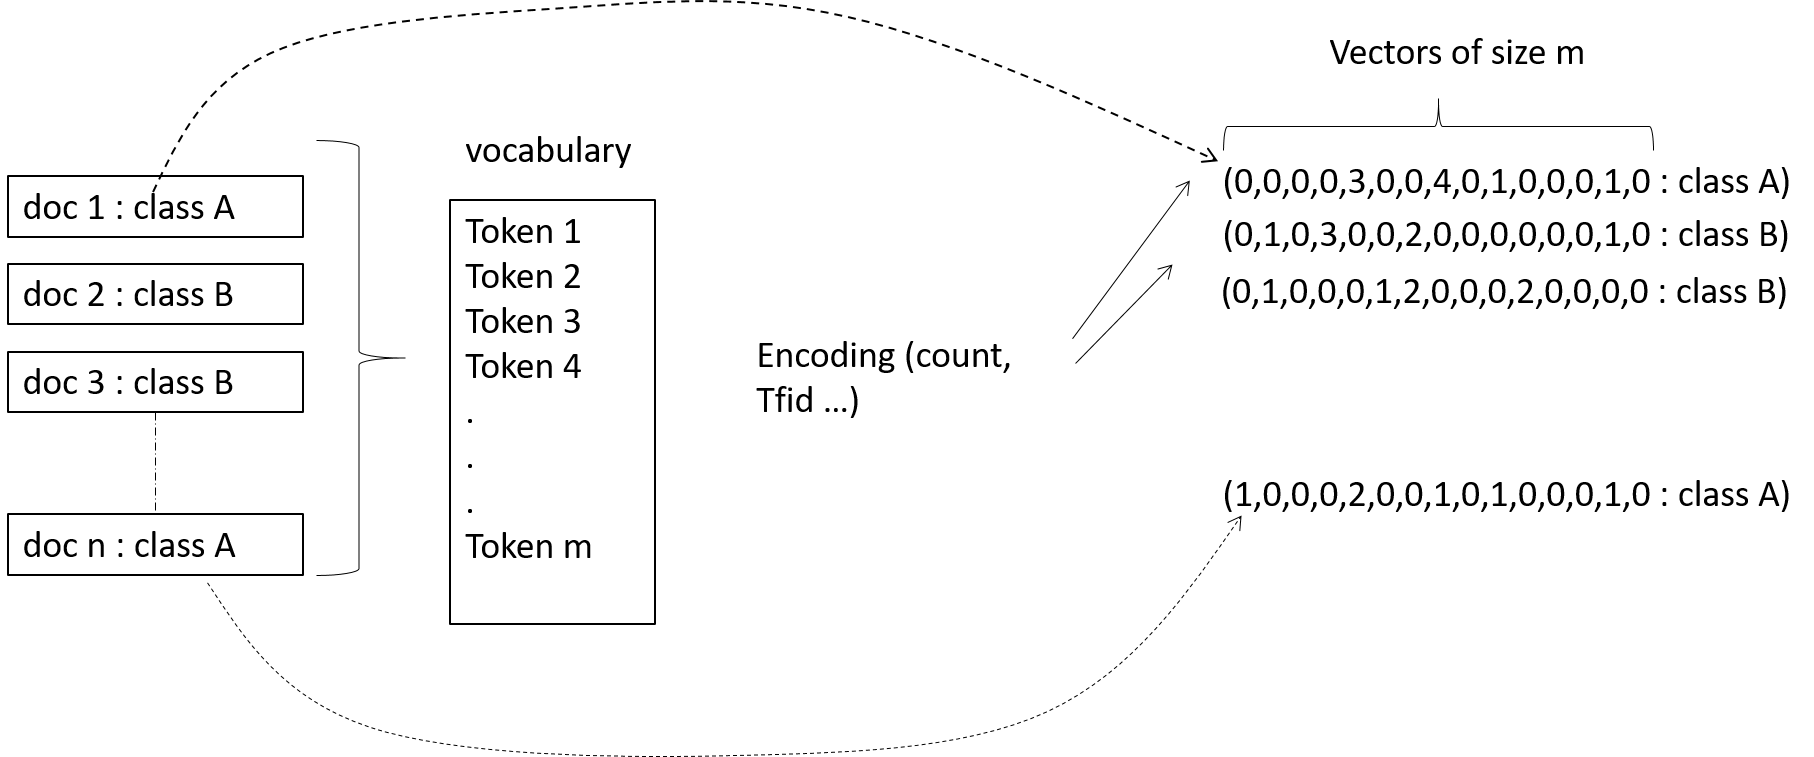

This list of counters can be use to learn the classification of documents.

 <code>Keras</code> and <code> scikitlearn </code> provide a lot of functions to encode document. Look at the example below:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog dog dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 3 1 1 1 1 1 2]]


### Question 2.2 :
Can you explain the result of this algorithm ? Dont' hesitate to change the <code>text</code> variable for that.

`vectorizer.vocabulary_` associe chaque mot de la phrase à un index selon l'ordre alphabétique.
 

# Using bag of words for sentiment analysis:
* We will create a bag of word for the imdDatabase

Extraction of imdb data to make idf vectors :

In [ ]:
from keras.datasets import imdb
labels=[]
texts=[]
textsTest=[]
labelsTest=[]

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
cpt=0
for td in train_data :
  decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in td])
  texts.append(decoded_review)
  labels.append(train_labels[cpt])
  cpt+=1

print("text : ", texts[15])
print("label : ", labels[15])


from sklearn.feature_extraction.text import CountVectorizer
# create the transform
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(texts)
# summarize
print("Bag of words :")
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform([texts[0]])
# summarize encoded vector
print("vector shape : ", vector.shape)

import numpy as np

vector = vectorizer.transform(texts)
print("vector shape : ")
print(vector.shape)
print("vector size : ")
print(vector.size)



1654784/1641221 [==============================] - 0s 0us/step
text :  ? a total waste of time just throw in a few explosions non stop fighting exotic cars a deranged millionaire slow motion computer generated car crashes and last but not least a hugh ? like character with wall to wall hot babes and mix in a ? and you will have this sorry excuse for a movie i really got a laugh out of the dr evil like heavily ? compound the plot was somewhere between preposterous and non existent how many ? are willing to make a 25 million dollar bet on a car race answer 4 but didn't they become ? through ? responsibility this was written for ? males it plays like a video game i did enjoy the ? ii landing in the desert though
label :  0
Bag of words :
{'this': 8805, 'film': 3420, 'was': 9463, 'just': 4841, 'brilliant': 1201, 'casting': 1440, 'location': 5220, 'scenery': 7579, 'story': 8366, 'direction': 2565, 'everyone': 3116, 'really': 7027, 'suited': 8505, 'the': 8763, 'part': 6313, 'they': 8789, 'pl

### Question 2.3 : 
Explain the output of the code above.

# Construction of the neural network

Epoch 1/20
45/45 [==============================] - 3s 45ms/step - loss: 0.5364 - accuracy: 0.7782 - val_loss: 0.3917 - val_accuracy: 0.8820
Epoch 2/20
45/45 [==============================] - 2s 42ms/step - loss: 0.3255 - accuracy: 0.8942 - val_loss: 0.3530 - val_accuracy: 0.8730
Epoch 3/20
45/45 [==============================] - 2s 42ms/step - loss: 0.2493 - accuracy: 0.9171 - val_loss: 0.2777 - val_accuracy: 0.9000
Epoch 4/20
45/45 [==============================] - 2s 41ms/step - loss: 0.2062 - accuracy: 0.9321 - val_loss: 0.2825 - val_accuracy: 0.8940
Epoch 5/20
45/45 [==============================] - 2s 41ms/step - loss: 0.1767 - accuracy: 0.9408 - val_loss: 0.2753 - val_accuracy: 0.8970
Epoch 6/20
45/45 [==============================] - 2s 41ms/step - loss: 0.1541 - accuracy: 0.9477 - val_loss: 0.2810 - val_accuracy: 0.8930
Epoch 7/20
45/45 [==============================] - 2s 41ms/step - loss: 0.1343 - accuracy: 0.9557 - val_loss: 0.3675 - val_accuracy: 0.8710
Epoch 8/20
45

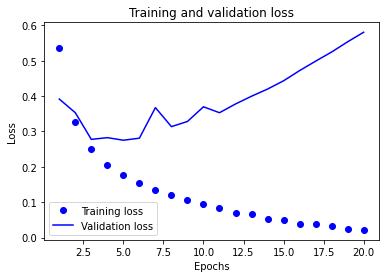

In [ ]:
from keras import models
from keras import layers
import tensorflow as tf
import numpy as np

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(9771,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


array=vector.toarray()
x_val_array = array[:2000]
y_val = np.array(labels[:2000])
partial_x_train_array = array[2000:]
partial_y_train_array = np.array(labels[2000:])

history = model.fit(partial_x_train_array,
                    partial_y_train_array,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_array, y_val))

#plot the results :
history_dict = history.history

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


###Question 2.4:
Compare the results with such obtained for the question 1.2 of the part 1.



# Improving Vectorization
With the previous proposition, the size of the input data will depend on the number of words used in all the documents and it could be very very high. Another problem is that the order of the words is not encoded and for natural langage, this order has a signification. (for instance the sentence 'the dog eat the cat' has the same encoding as 'the cat eat the dog' if we don't take care to the order). All these problems are addressed with the notion of **word embedding**

# Word embeddings

**word embedding :** word embedding is a more recent and powerfull way to encode words by associating a dense vector to tokens. Embeddings translate large sparse vectors into a lower-dimensional space that (is supposed to) preserves semantic relationships. 
While the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros) and very high-dimensional (same dimensionality as the 
number of words in the vocabulary), "word embeddings" are low-dimensional floating point vectors 
(i.e. "dense" vectors, as opposed to sparse vectors). 
Unlike word vectors obtained via one-hot encoding, word embeddings are learned from data. 
It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1024-dimensional when dealing with very large vocabularies. 
On the other hand, one-hot encoding words generally leads to vectors that are 20,000-dimensional or higher (capturing a vocabulary of 20,000 
token in this case). So, word embeddings pack more information into far fewer dimensions. 

**Semantics in vector ?**
The advantage of word embedding is not only the size of the encoding but the possibility to introduce semantic via the Euclidian distance between vectors. i.e. the more two words have a similar semantics, the more the euclidian distance (L2) between their vectors will be low. The figure below is an illustration in the case of vector of 3 dimensions (generally, the number of dimensions is higher of course). 

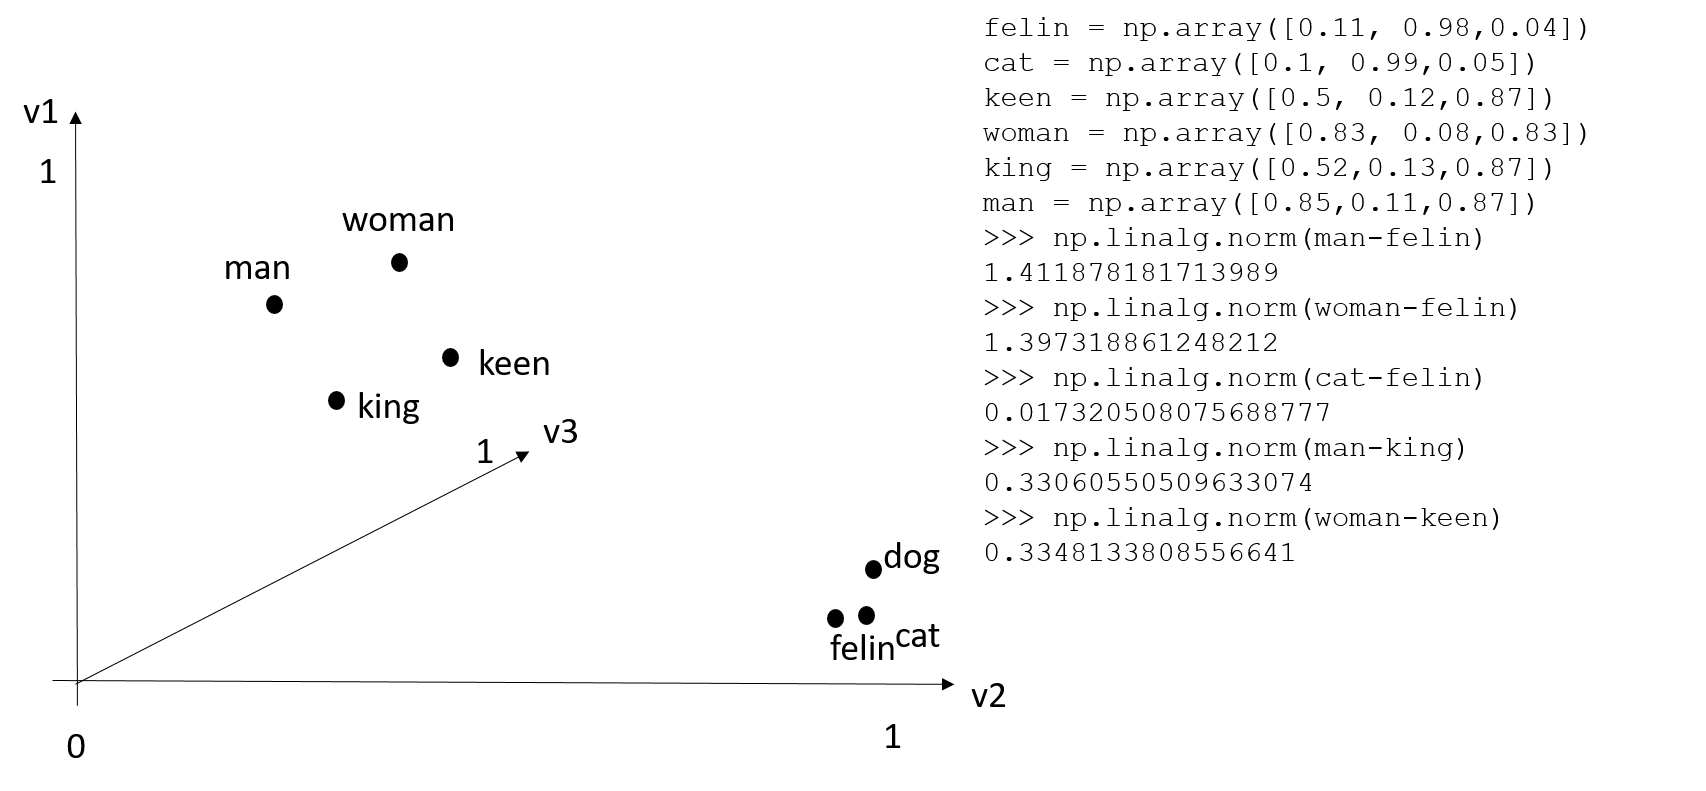

**How to obtain word embedding vectors ?**

That's **the question** ... the problem is that there is not a **best** word embedding "in general" because the quality of this embedding (as well as the semantic proximity between two words) can depend on the problem to solve (classification, generation, translation, completion). The trick is to use machine learning technics to learn the vector. Keras makes it even easier. It's just about learning the weights of a layer: the `Embedding` layer.

## Learning word embeddings with the `Embedding` layer




In [ ]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)


The `Embedding` layer is best understood as a dictionary mapping integer indices (which stand for specific words) to dense vectors. It takes 
as input integers, it looks up these integers into an internal dictionary, and it returns the associated vectors. It's effectively a dictionary lookup.

There are a lot of proposition to train an embedding layer. The simpler is to train it to make a classification as we did for the IMDB movie review data. However, the goal is not to obtain an excellent result but rather to propose a mean to pass from a word to a vector that allows for distinguish each possible words. For that we don't need the use of huge amount of data but just some examples that include the vocabulary. In the code below, we only use the 20 first words of each text of the IMDB database. 



In [ ]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_train[0])
print(x_train[1])



[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]
[  23    4 1690   15   16    4 1355    5   28    6   52  154  462   33
   89   78  285   16  145   95]


###Question
Can you explain the signification of the values printed above.

We will train a network that includes an embedding layer able to encode words to a vector of 8 values. We need to add a dense layer in order to learn the class of each (beginning of) documents. It is worth notice that the goal here is not to obtain a excellent accuracy but a mean to encode words. After having learnt the embedding layer, it will be use in a deeper architecture. 

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen, name='embedding_layer'))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6662 - acc: 0.6354 - val_loss: 0.6159 - val_acc: 0.7016
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5399 - acc: 0.7520 - val_loss: 0.5270 - val_acc: 0.7348
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4610 - acc: 0.7858 - val_loss: 0.5019 - 

The code blow show the embedding vector:

In [ ]:
emb_lay = model.get_layer("embedding_layer")
weights = emb_lay.get_weights()
print(weights)
weightsArray=np.asarray(weights)
print(weightsArray.shape)

[array([[-0.05141131,  0.08896036, -0.07815216, ..., -0.08388113,
         0.01034612, -0.0215562 ],
       [ 0.1744663 ,  0.10779011, -0.05048214, ..., -0.06274515,
         0.05327082,  0.09395875],
       [ 0.03642268,  0.0600403 , -0.01151796, ...,  0.01973611,
         0.01745829, -0.07833219],
       ...,
       [-0.02065003, -0.03260835, -0.09739555, ..., -0.02928038,
        -0.01983889,  0.01695829],
       [ 0.05728957,  0.06721821,  0.01266232, ..., -0.04763705,
         0.04083396,  0.05354549],
       [ 0.06572182, -0.053538  ,  0.01672462, ..., -0.00278065,
         0.00286585, -0.01420901]], dtype=float32)]
(1, 10000, 8)


###Question
Can you explain the shape of this embedding vector ?

# Improvement of the data encoding: word2vect and Glove

It is not sure that the previous embedding layer takes into account semantical information. At minima it can introduce proximities between words, that help to predict the two classes that were learnt.
Data scientists provide specific embedding layers that are trained to take into account semantics. It is the case of the **word2vec** model. **word2vec** is based on a neural network trained to predict words that are close to another word in documents. It is based on distributional hypothesis where the context for each word is in its nearby words. The practical trick is that to train the network you only need texts without predefined classification (remember that until now we needed a class for each text - positive or negative - to train our networks for sentiment analysis). Yet, classification is a diffult task because it is realized manually. With **word2vect**, if you put one word `w1`as input, the network (must) predict the words that are close to `w1` and you can compare this prediction with the text itself. As you don't need predefined classes, it is considered as a *non-supervised learning* and it is possible to train the model easily with a huge amount of texts. For example, there exist pre-defined vectors trained on part of Google News dataset (about 100 billion words) or Wikipedia. In this case the size of the vector is of several hundred. It is out of this introduction to learn in detail **word2vect** but if you are interested in, a clear explanation is available [here](https://towardsdatascience.com/an-implementation-guide-to-word2vec-using-numpy-and-google-sheets-13445eebd281). 



Another kind of embedding vector is **glove**, the goal of **glove** is globally the same as **word2vec** but it is not based on a neural network and moreover, it takes into account the number of co-occurence of words, information that is not really analysed by **word2vec**. **glove** is based on probabilities.